<img src="images\Logo_UCLL_ENG_RGB.png" style="background-color:white;" />

# Data Analytics & Machine learning

Lecturers: Aimée Lynn Backiel, Kenric Borgelioen, and Daan Nijs

Academic year 2024-2025

## Lab 4: Data visualization

### Lecture outline

1. Recap last week
2. Data visualization with Matplotlib, Seaborn and Plotly 

### Recap of last lecture(s)

#### Lab 1

1. We ensured we had a valid Python installation.
2. We learnt what a virtual environment is:
   * Isolated Python executable and packages.
   * We created a virtual environment.
3. Absolute path vs relative path recap.
4. Recap of data structures in Python

#### Lab 2
1. Installed Pandas
2. Learnt how to read data
3. Learnt how to calculate mean, mode, median etc.
4. Basic exploration of the 4 variables

#### Lab 3
1. Wrapped up computing summary statistics (mean, median, mode, ...)
2. Learnt how to deal with outliers 
3. Focused on exploration of dat



### Interpretation of correlation

Lab lecture there was a bit of discussion of how interpret correlations. The previous lab said a correlation of 0.75 could be interpreted as follows:

> If variable A increases with 1 unit variable B increases with 0.75 units.

**That is usually incorrect.** 

The (sample) correlation $r_{X,Y}$ is given as:

$$
r_{x,y} = \frac{cov(x,y)}{(n-1)s_{x}s_{y}} = \frac{\sum_{i=1}^{n}{(x_{i} - \bar{x})(y_{i} - \bar{y})}}{(n-1)s_{x}s_{y}}
$$

We have some notation to unpack here.

We have two variables $x$ and $y$. These each have a mean $\bar{x}$ and $\bar{y}$ pronounced as x bar and y bar respectively, $s_{x}$ and $s_{y}$ are respectively the standard deviations of x and y.

The first equality shows us that the correlation $r_{x, y}$ is a normalized version of something called the covariance (cov). The scaling is achieved by dividing by a factor related to the product of the standard deviations of the two variables. This is what ensures that $r_{x,y} \in [-1, 1]$. 

Thee covariance expresses the joint variability of two variables. A covariance of 8 means that if variable x increased by 1 the other variable increases by an amount that is dependent on the units and scale of both variables; it doesn't specify a fixed number of units either.

Thus, the correct interpretation of a correlation coefficient is: 

> A correlation coefficient, measures the strength and direction of a linear relationship between two variables, but not the slope of that relationship.

Finally, to know how much one variable varies in function of the other we can look at the regression slope:

$$
\beta_{y} = r_{x,y}\frac{s_{x}}{s_{y}}
$$

The slope of the regression has a deep connection with the correlation. It's the correlation weighted by the proportion of the standard deviations. Logically, if $s_{x} = s_{y}$ the interpretation given last lecture holds. Generally that is not the case, so those that made this remark last lecture were correct. The equation above shows that it is trivial to recover the slope from the correlation.

It is important to remember that correlations and the slope of a regression are expressing linear relationships. As discussed last lecture Anscombe's quartet consists of four datasets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. **This highlights the importance of visualizing data and not relying solely on statistical metrics.**

### The case

Ada Turing Travelogue, or as everyone calls her, Ada just started working part time at her parents travel agency. She has a keen understanding and interest of everything related to applied computer science ranging from server & system management to full stack software development. Through database foundations she already understands how to query data and programming 1 and 2 covered the essentials about the Python programming language. Recently she has just decided to start learning about data analytics & machine learning as well.

She uses her skills to connect to the travel agency's database where she finds many, normalized, tables. Ada recalls what she learnt in database foundations and performs all the correct joins. Afterwards she saves the data in the `data/` folder.


She finds the following dataset:

| Column Name          | Description                                                                                       |
| -------------------- | ------------------------------------------------------------------------------------------------- |
| SalesID              | Unique identifier for each sale.                                                                  |
| Age                  | Age of the traveler.                                                                              |
| Country              | Country of origin of the traveler.                                                                |
| Membership_Status    | Membership level of the traveler in the booking system; could be 'standard', 'silver', or 'gold'. |
| Previous_Purchases   | Number of previous bookings made by the traveler.                                                 |
| Destination          | Travel destination chosen by the traveler.                                                        |
| Stay_length          | Duration of stay at the destination.                                                              |
| Guests               | Number of guests traveling (including the primary traveler).                                             |
| Travel_month         | Month in which the travel is scheduled.                                                           |
| Months_before_travel | Number of months prior to travel that the booking was made.                                       |
| Earlybird_discount   | Boolean flag indicating whether the traveler received an early bird discount.                     |
| Package_Type         | Type of travel package chosen by the traveler.                                                    |
| Cost                 | Calculated cost of the travel package.                                                            |
| Margin | The cost (for the traveler) - what the travel agency pays. |
 | Additional_Services_Cost| The amount of additional services (towels, car rentals, room service, ...) that was bought during the trip. |


### Helping Ada explore the dataset

The main goal for the remainder of this lab is to explore the data. We will specifically take five columns:

* Cost
* age
* stay length
* Destination
* Country

Our goal is to find interesting relationships between them.

As was covered in the book and lecture there are to main data types in analytics: categorical and continuous data. This is a crucial first step in your analysis because it determines what methods make sense on your data.


**The goal is primarily to find out what influences the cost of the stay.**

### Introduction to plotting with Matplotlib, Seaborn and Plotly

#### From Exploration to Presentation

When dealing with data, there's a journey we often embark on:

1. **Exploratory Phase (Exploratory Data Analysis)**: 
   - **What it is**: At this stage, we're diving into the data, much like a researcher in a lab. We're experimenting, testing hypotheses, and analyzing patterns. It's a phase of discovery, and sometimes it gets technical and intricate.
   - **Who it's for**: Primarily for those who are closely working with the data, like data scientists and analysts. It's about understanding, not necessarily communicating.
   - **Visuals**: Charts and graphs here can be detailed and complex because they serve as tools for understanding.

2. **Presentation Phase (Explanatory Data Visualization)**: 
   - **What it is**: Once we've gained insights from our exploration, it's time to share them. Think of this as distilling our findings into a clear message or story.
   - **Who it's for**: A wider audience, which could include stakeholders, team members, or anyone who needs to understand the main takeaways.
   - **Visuals**: Here, simplicity and clarity take the front seat. The visuals are designed to be understood quickly and should align with the principles of clarity, simplicity, accuracy, and relevance.

In short, the process starts with a deep dive into the data for insights and ends with a clear, concise presentation of those insights for everyone to grasp.

In the case of explanatory data analysis the following four principles hold:

1. **Clarity**: The main goal is to convey insights in a way that's immediately understandable. If you have to spend too much time figuring out what a chart is saying, then it's not doing its job.

2. **Simplicity**: The most effective visuals are often the simplest. It's about getting the message across, not showing off fancy graphics.

3. **Accuracy**: It's vital to represent data truthfully. Misleading visuals not only harm credibility but can also lead to wrong conclusions.

4. **Relevance**: Every piece of information on your visual should serve a purpose. If it doesn't help convey the main insight, consider removing it.

With these principles in mind, our aim in this lab is to create visuals that stand on their own and communicate effectively. We want every chart or graph to be so intuitive that it needs little to no explanation.

#### Reading and exploring data

In [1]:
import pandas as pd # by convention
pd.options.display.float_format = '{:.2f}'.format

In [2]:
travel_dataset = pd.read_csv("data/lab_4_dataset.csv")

### Introduction to plotting with Matplotlib, Seaborn and Plotly

We have helped Ada so far to gain insights into her data by wrangling it into shape and making tables to summarize data. Now, to further enhance our understanding and visualize the patterns, trends, and potential anomalies, we will be plotting the data. 

Making data visual simplifies complex datasets and also makes it more intuitive for stakeholders to grasp key takeaways. By transitioning from tabular summaries to graphical plots, we can also communicate more effectively.

#### Matplotlib

<center>
<img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" style="background-color:white">
</center>

The name matplotlib comes from matrix plotting library. It's a descendant from the MATLAB programming language. It's by now an older library (2003) that has some quirks, but it is still important to know the basics of Matplotlib since other Python plotting libraries build on top of it. 

In [3]:
# uncomment to install
# %pip install seaborn 
# %pip install plotly 

In [4]:
import matplotlib.pyplot as plt # convention
import numpy as np

##### Plotting univariate data


The table below is a summary of the different types of plots for **numeric data**.

| Plot Type          | Description                                           | When to Use                                                      |
|--------------------|-------------------------------------------------------|------------------------------------------------------------------|
| **Histogram**      | Displays the distribution of a single continuous variable by dividing the data into bins and showing the frequency of observations in each bin. | To visualize the distribution of a variable, especially to identify its central tendency (mean), spread (standard deviation), and skewness (are low or high values more common).  |
| **Box Plot (or Whisker Plot)** | Shows the distribution of a variable using quartiles and displays potential outliers. | To get a summary of a variable's distribution in terms of its median, quartiles, and possible outliers. Useful when comparing the distribution across categories. |
| **Density Plot (or Kernel Density Plot)** | Provides a smoothed version of a histogram. | To visualize the distribution of a variable in a continuous manner. Particularly useful when comparing the distributions of multiple variables on the same plot. |
| **Violin Plot**    | Combines aspects of box plots and density plots.       | To visualize both the distribution and summary statistics of a variable. Especially useful when comparing across different categories. |


The syntax for plotting is generally `plt.<plotType>(x, y)`. 

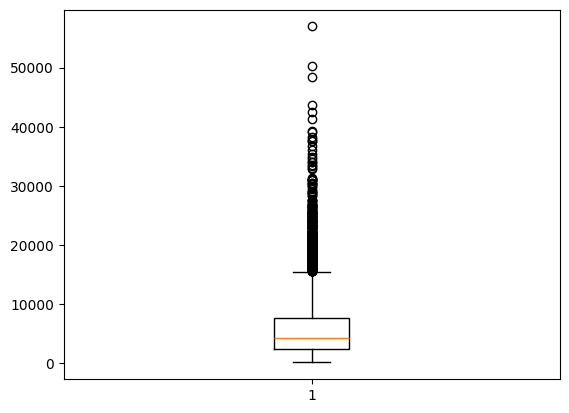

In [5]:
plt.boxplot(travel_dataset["cost"]); # Matplotlib prints things while plotting, the semicolon an suppress it.

A boxplot provides a comprehensive view of a dataset's distribution, offering more detailed insights than typical tables. The central line within the box represents the median, splitting the data into its lower and upper halves. The box itself is framed by two lines: the lower boundary represents the 25th percentile (or Q1), meaning 25% of the data lies below this value, and the upper boundary denotes the 75th percentile (or Q3), indicating that 75% of the data is below this point.

The range between Q3 and Q1 is known as the Interquartile Range (IQR). Beyond the box, the plot extends 'whiskers'. Their "distance" is calculated as `1.5 * IQR` both above and below the box, providing a range for typical data points. Any data outside these whiskers can be considered outliers.

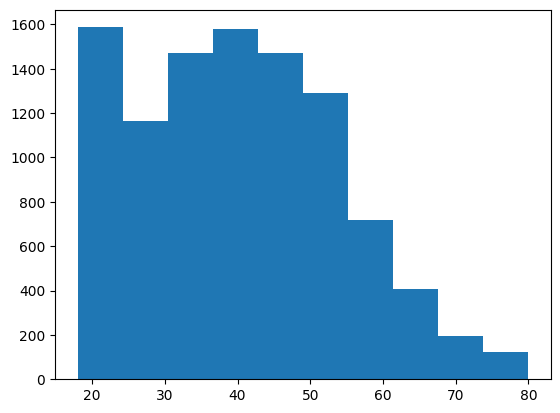

In [35]:
plt.hist(travel_dataset["age"], bins=10);

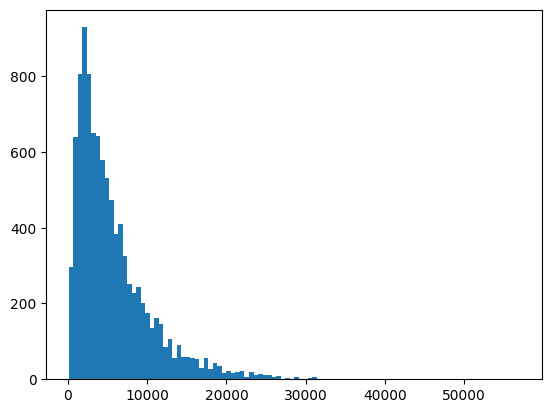

In [7]:
plt.hist(travel_dataset["cost"], bins=100);

For categorical data, categories can often serve as a basis for comparison in other plots, like boxplots. This means you can use a single category to differentiate data within such plots. You can also produce the same type of plot multiple times, once for each category, to analyze patterns within individual categories.


| Plot Type     | Description                                          | When to Use                                         |
|---------------|------------------------------------------------------|-----------------------------------------------------|
| **Count Plot**| Represents the frequency or count of each category.  | To see how often each category appears in the data. |

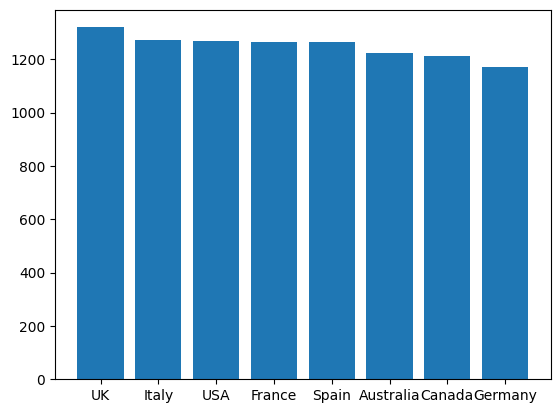

In [8]:
country_counts = travel_dataset["country"].value_counts()
plt.bar(x=country_counts.index, height=country_counts);

##### ❓ How do the plots so far score on our 4 criteria:

1. **Clarity**: The main goal is to convey insights in a way that's immediately understandable. If you have to spend too much time figuring out what a chart is saying, then it's not doing its job.

2. **Simplicity**: The most effective visuals are often the simplest. It's about getting the message across, not showing off fancy graphics.

3. **Accuracy**: It's vital to represent data truthfully. Misleading visuals not only harm credibility but can also lead to wrong conclusions.

4. **Relevance**: Every piece of information on your visual should serve a purpose. If it doesn't help convey the main insight, consider removing it.


They score poorly on clarity:

1. Unlabeled axes mean it's very hard to know what the plot is showing. The axes should also have units.
2. The title is missing as well.

They're simple, accurate and relevant though.

##### Customizing our graphs 

In order to use matplotlib properly it's important to understand how the library expects you to use it. Many of the qualms people have of matplotlib are due to fighting against it's API. To understand how the library wants to be used it is always a good idea to consult <a href="https://matplotlib.org/stable/users/explain/quick_start.html">the documentation</a>.

<center>
<img src="https://matplotlib.org/stable/_images/anatomy.png" style="background-color:white;width:50%">
</center>


The image below explains the key idea of Matplotlib. Plots are made on a `Figure` object. A `Figure` object can contain multiple `Axes`. `Axes` are the things you are plotting on. THere are more elements than this, but for the scope of this course this is enough to get started. 

Instead of using `plt.<plotType>` as we have done in the past, we will explicitly make a `Figure` and plot on the axis. This allows us to configure the `Figure`.

The figure above shows many of the customization options you have.

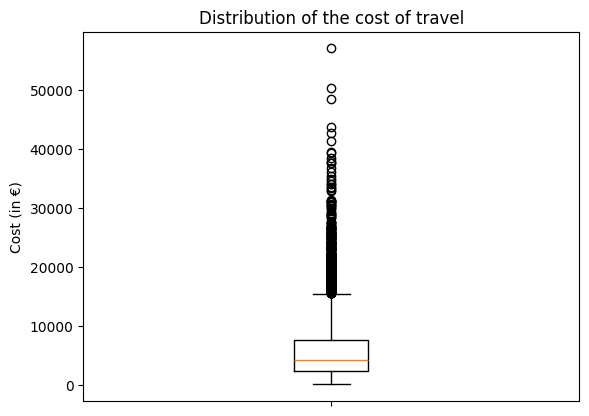

In [9]:
fig, ax = plt.subplots() # Notice the S, subplots not subplot.
ax.boxplot(travel_dataset["cost"])
ax.set_title("Distribution of the cost of travel")
ax.set_ylabel("Cost (in €)")
ax.set_xlabel("")
ax.set_xticklabels("");

We can also have multiple axes in a figure. We can do that by specifying the rows and columns in `plt.subplots()`.

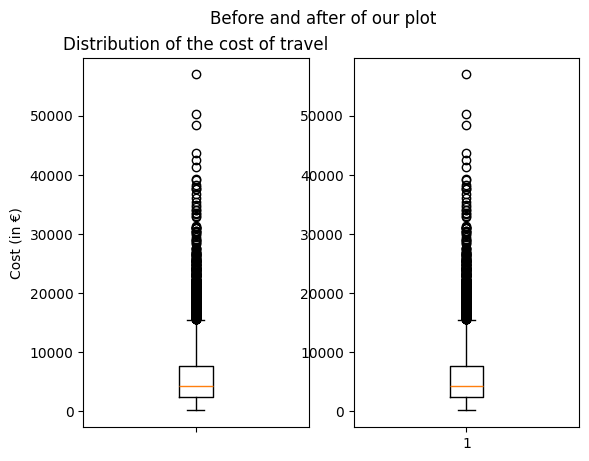

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Before and after of our plot")
ax[0].boxplot(travel_dataset["cost"])
ax[0].set_title("Distribution of the cost of travel")
ax[0].set_ylabel("Cost (in €)")
ax[0].set_xlabel("")
ax[0].set_xticklabels("");
ax[1].boxplot(travel_dataset["cost"]);

Notice how adding `nrows` and `ncols` turns our `Axes` into a (Numpy) array. To plot we simply index the right one and plot. The next step we need to do is make our plot larger. That is done by using the `figsize` argument in `plt.subplots`. 

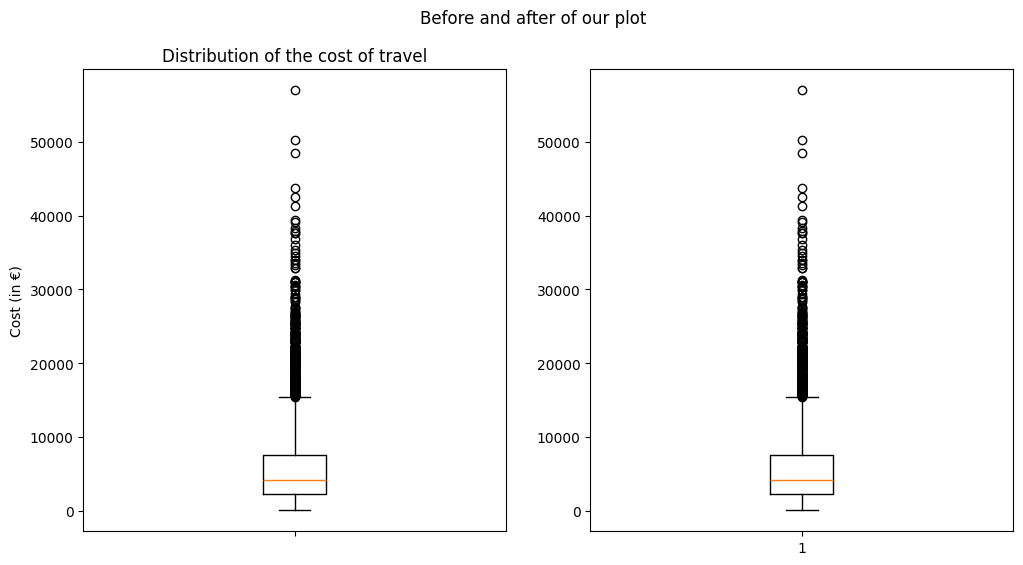

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle("Before and after of our plot")
ax[0].boxplot(travel_dataset["cost"])
ax[0].set_title("Distribution of the cost of travel")
ax[0].set_ylabel("Cost (in €)")
ax[0].set_xlabel("")
ax[0].set_xticklabels("");
ax[1].boxplot(travel_dataset["cost"]);

##### ❓ Make a figure that consists of two axes with a histogram and a boxplot for our numeric variables. Ensure the plot takes into account clarity. Play around with the bins argument of `plt.hist`

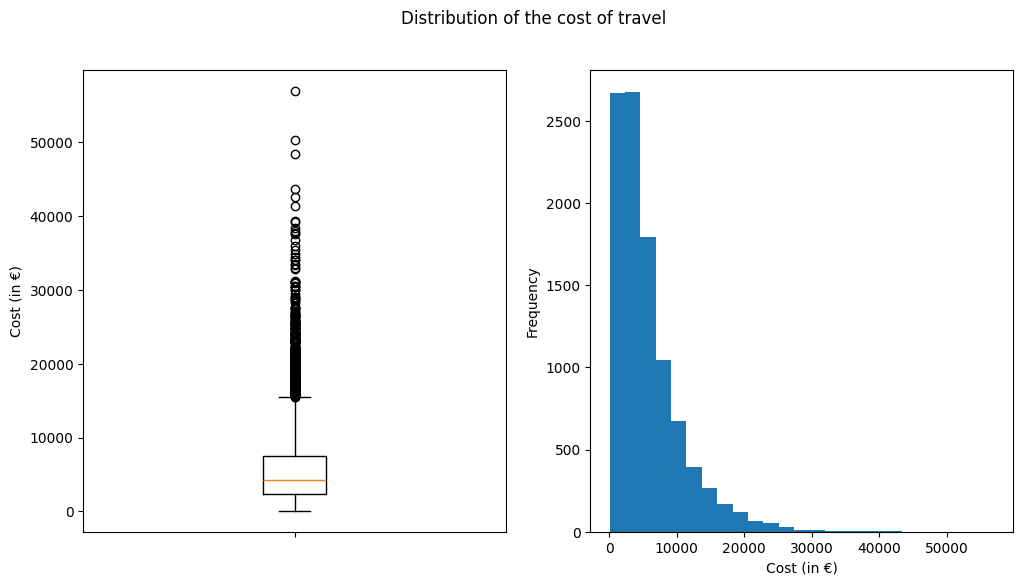

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle("Distribution of the cost of travel")
ax[0].boxplot(travel_dataset["cost"])
ax[0].set_ylabel("Cost (in €)")
ax[0].set_xlabel("")
ax[0].set_xticklabels("");
ax[1].hist(travel_dataset["cost"], bins=25)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Cost (in €)");


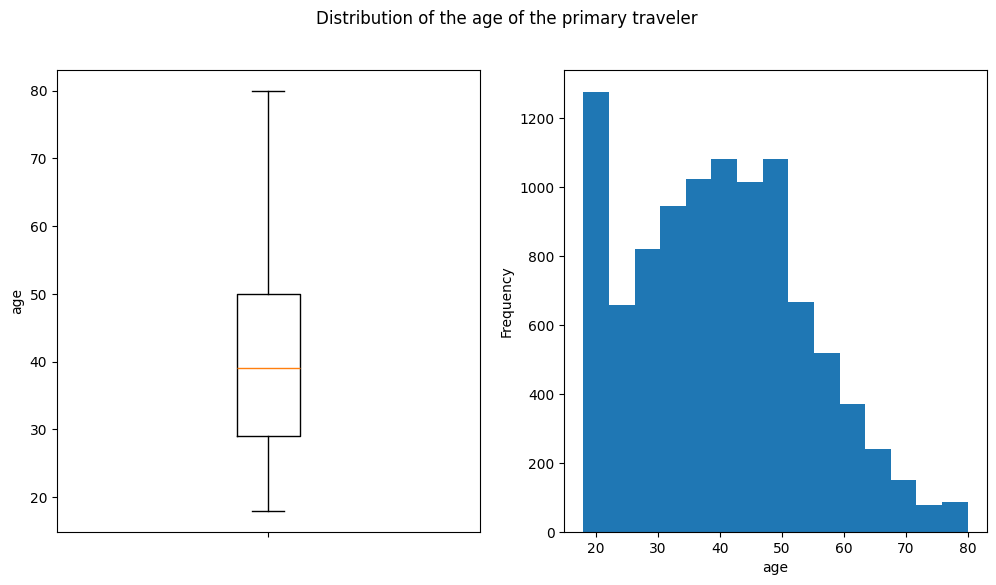

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle("Distribution of the age of the primary traveler")
ax[0].boxplot(travel_dataset["age"])
ax[0].set_ylabel("age")
ax[0].set_xlabel("")
ax[0].set_xticklabels("");
ax[1].hist(travel_dataset["age"], bins=15)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("age");


There is an additional way to make that you can use if you do not want to interact directly with Matplotlib. Selecting data with Pandas and using `.plot()` will make a similar plot with less effort. It's still important to know the fundamentals of Matplotlib because it still uses it under the hood and customization may still require using the subplots API. We will show you two styles of interacting with it.

<Axes: xlabel='country'>

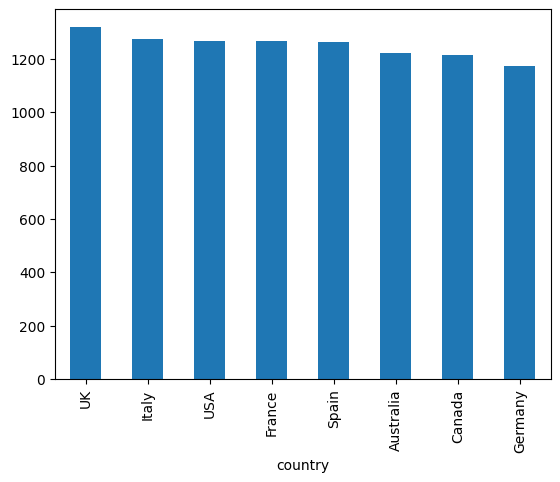

In [14]:
travel_dataset["country"].value_counts().plot(kind="bar")

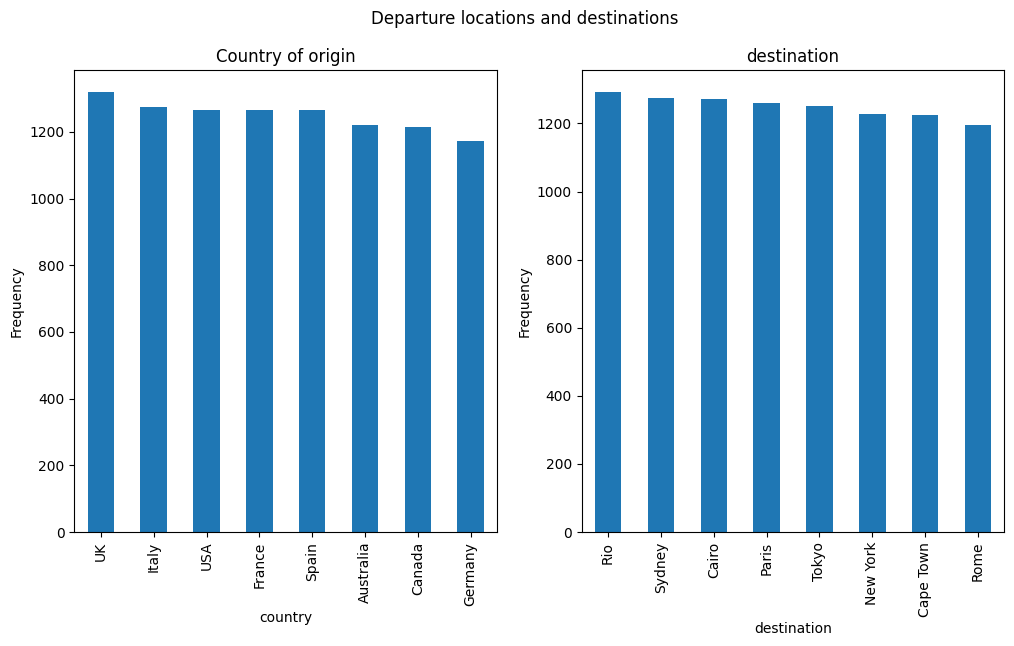

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Departure locations and destinations")
ax[0].set_title("Country of origin")
ax[0].set_ylabel("Frequency")
travel_dataset["country"].value_counts().plot(kind="bar", ax=ax[0])
travel_dataset["destination"].value_counts().plot(kind="bar", title="destination", ax=ax[1], ylabel="Frequency");

#### Bivariate and multivariate plotting with Seaborn

<center>
<img src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg" style="background-color:white;width:50%">
</center>




Seaborn is the next plotting library we will use. It should be your go-to in the Python, especially if you're using Pandas. It was specifically built with the Pandas library and data analysis in mind. It makes doing certain plots a lot easier and has a number of sensible defaults (e.g., colors) that are better than Matplotlib. At the end of the day, it is fully built on top of Matplotlib so everything we have learn about customization still holds. We will continue our analysis using Seaborn and see how it can aid us in specifically bivariate and multivariate analysis.

In [16]:
import seaborn as sns

Last lecture we looked at a number of relationships we found interesting:

* Cost and destination
* Cost and Country
* Cost and Destination
* Age and Destination
* Country and destination

##### Numeric - Numeric Data

| Plot Type          | Description                                           | When to Use                                                      |
|--------------------|-------------------------------------------------------|------------------------------------------------------------------|
| **Scatter Plot**   | Displays values for two variables for a set of data using dots. | To identify relationships or correlations between two numeric variables. |
| **Hexbin Plot**    | Groups points into hexagonal bins and colors them based on the count of points in each bin. | When there's a large amount of data that may overlap in a scatter plot. Useful for visualizing density and relationships between two numeric variables. |
| **Line Plot**      | Connects data points with lines. Typically used for **time series data**. | To visualize trends over time or the relationship between two numeric variables when there's an ordering to the data points. Do not use this if there's no possible observations between the lines. |
| **Joint Plot**     | Combines scatter plots with histograms for each variable. | To view the relationship between two numeric variables and their individual distributions simultaneously. |



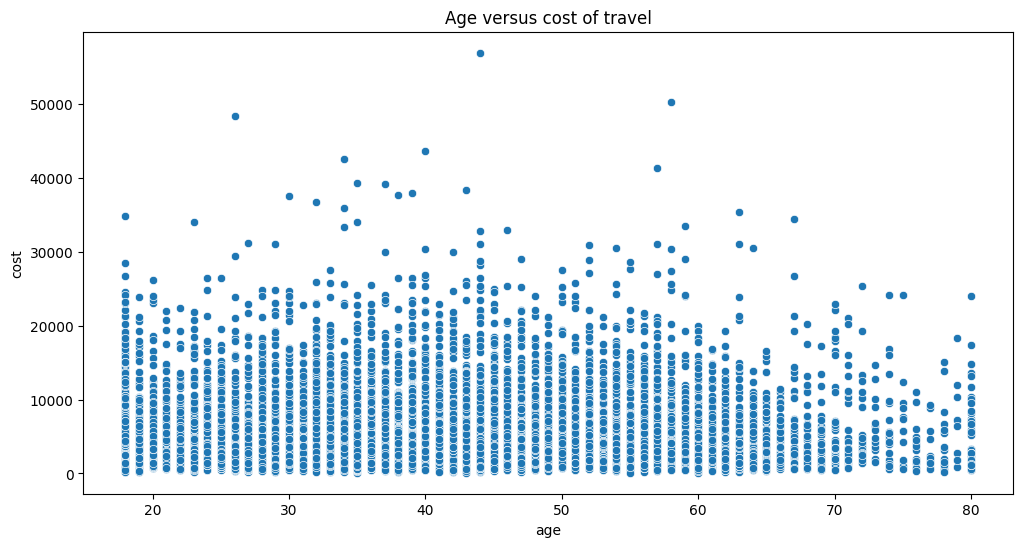

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Age versus cost of travel")
sns.scatterplot(travel_dataset, x="age", y="cost", ax=ax);

A a glance we can see that Seaborn comes with a number of sensible defaults:

1. The x and y-axis are labeled
2. Generally the colors look a bit easier on the eyes than matplotlib.

It also has plot types that do not exist natively in Matplotlib such as `sns.countplot` and `sns.jointplot`.

In [18]:
import matplotlib.ticker as ticker

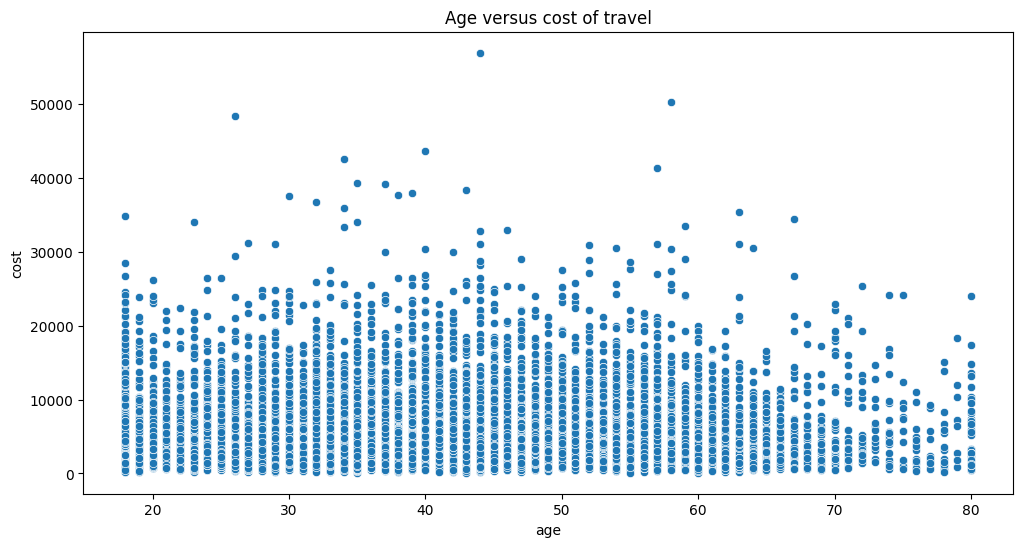

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Age versus cost of travel")
sns.scatterplot(travel_dataset, x="age", y="cost", ax=ax);

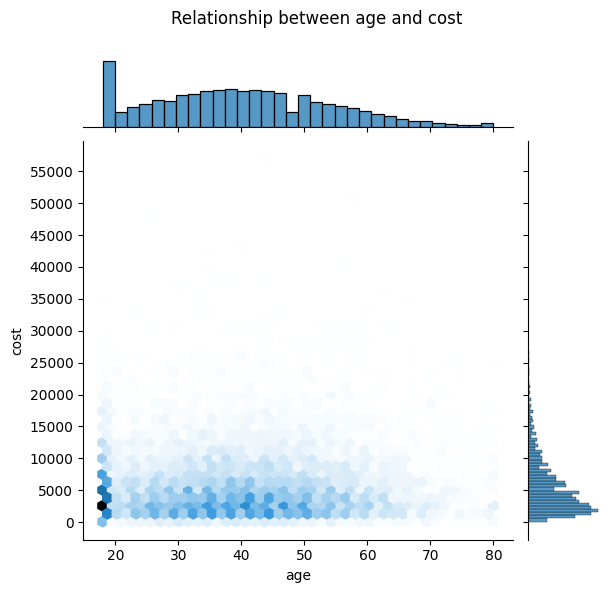

In [28]:
g = sns.jointplot(travel_dataset, x="age", y="cost", kind="hex");
g.figure.subplots_adjust(top=0.9) # Add some spacing 
g.figure.suptitle("Relationship between age and cost")
g.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(5000)) # This is how to increase the tick frequency 

Notice how Seaborn sometimes returns objects that wrap Matplotlib `Figure`s and `Axes`. It's a higher level interface to Matplotlib so we still need to dip into the lower level interface to do certain things.

##### ❓ The last plot is a combination of a hexgrid and a histogram. How well does it score in terms of our 4 criteria:


1. **Clarity**: The main goal is to convey insights in a way that's immediately understandable. If you have to spend too much time figuring out what a chart is saying, then it's not doing its job.

2. **Simplicity**: The most effective visuals are often the simplest. It's about getting the message across, not showing off fancy graphics.

3. **Accuracy**: It's vital to represent data truthfully. Misleading visuals not only harm credibility but can also lead to wrong conclusions.

4. **Relevance**: Every piece of information on your visual should serve a purpose. If it doesn't help convey the main insight, consider removing it.

It doesn't do well on clarity and simplicity. It's a very powerful graph but it's conveying too much information. You should ideally separate this into 2 or more plots.

##### Categorical - Numeric Data: small multiples and colour coding


**Small multiples**

Imagine you have a lot of similar data points from different categories, and you want to compare them side by side. This is where the magic of small multiples comes into play.

**What Are Small Multiples?**
Small multiples are a series of similar graphs or charts using the same scale and axes, allowing them to be easily compared. They divide data by categories and present each category in its own panel within a larger visualization.

**Why Use Them?**

1. **Consistency**: Because each graph uses the same scale and axes, it's easy to compare data across categories directly.
2. **Clarity**: By separating data into individual panels, the viewer can clearly see patterns or trends within each category without them being obscured by other data.
3. **Efficiency**: Instead of toggling between different views or using interactive tools to sift through data, viewers get a simultaneous snapshot of all categories at once.

**Remember**: 
The general idea behind small multiples is consistency in presentation but separation in data. By creating one graph per category, you're allowing your audience to quickly and efficiently draw insights from a collective set of data points, making your presentation both comprehensive and comprehensible.

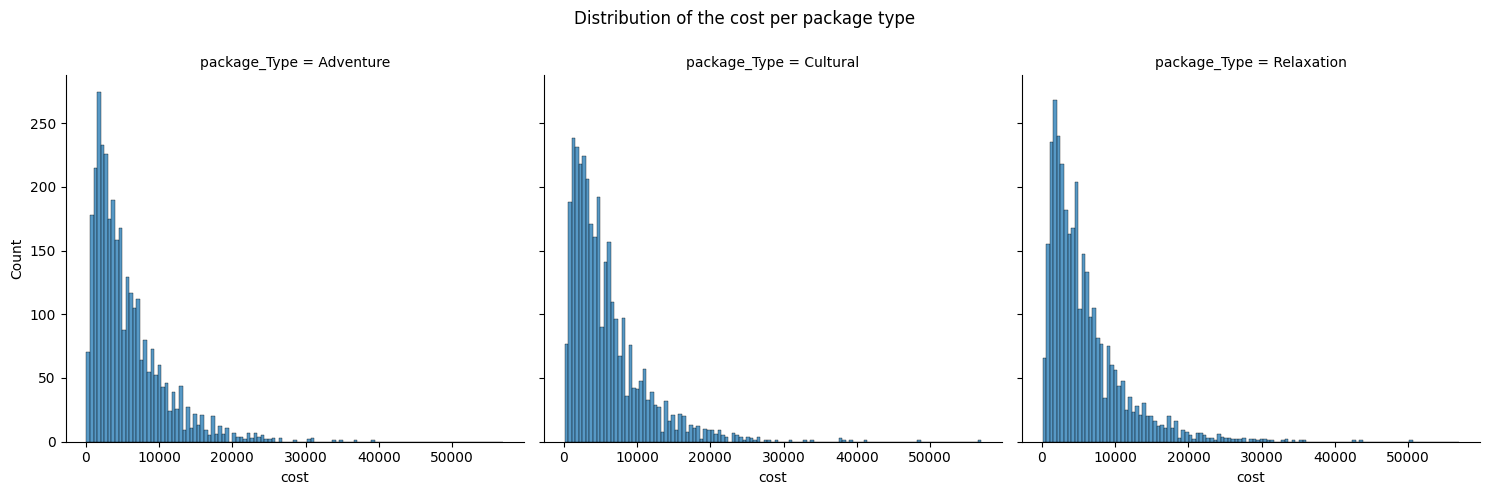

In [29]:
g = sns.displot(travel_dataset, x="cost", col="package_Type")
g.figure.suptitle("Distribution of the cost per package type")
g.figure.subplots_adjust(top=0.85)

<Axes: title={'center': 'Distribution of cost per country'}, xlabel='country', ylabel='cost'>

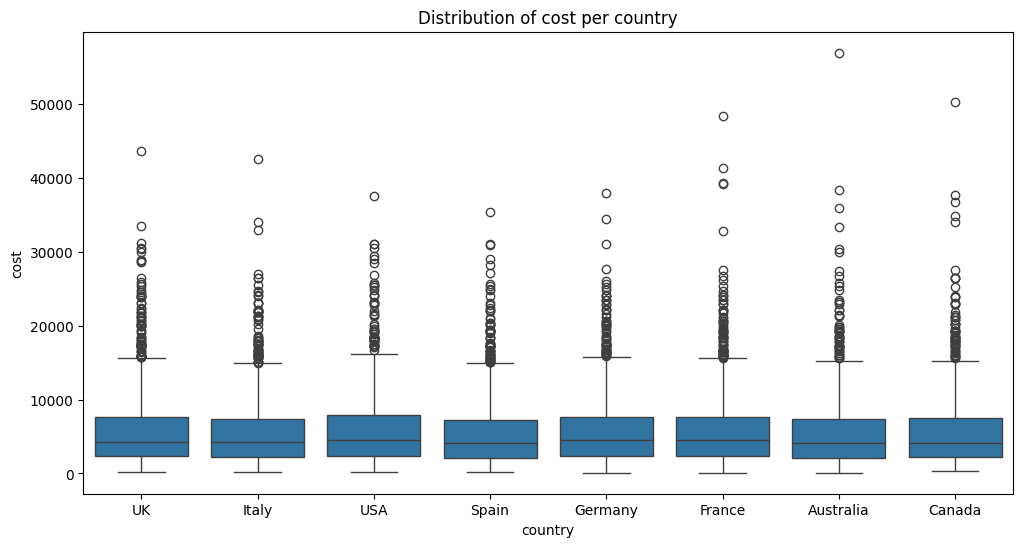

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Distribution of cost per country")
sns.boxplot(travel_dataset, x="country", y="cost",ax=ax)

**Color-Coding**

Sometimes, when we have multiple categories of data, it can be effective to display them all on one graph, using color as a key differentiator. 

**Why Use Color-Coding?**

1. **Unified View**: One of the main advantages of using color is that it presents all the categories in a single, unified plot. This can provide a holistic view and show interactions or overlaps between categories.
 
2. **Space Efficiency**: Instead of dividing your canvas into multiple sections, color-coding allows you to utilize the entire space for a singular, impactful visualization.

3. **Quick Comparisons**: With the right color choices, the eye can quickly discern between categories and compare their relative positions or values.

**When is Color-Coding Useful?**

1. **Limited Categories**: Color-coding works best when the number of categories is limited. If there are too many categories, the plot can become cluttered and colors hard to distinguish.

2. **Overlapping Data Points**: If you're interested in seeing where data points from different categories intersect or overlap, using color on a single plot can be very effective.

3. **Emphasis on Relationships**: When the relationship or interaction between categories is more important than individual category trends, a color-coded unified plot can be invaluable.


**Comparison with Small Multiples**: 
While small multiples separate data by categories into individual panels for clarity, color-coded plots display all data on one graph for a unified perspective. The choice between them often depends on the specific goals of the visualization and the nature of the data.

<Axes: title={'center': 'Distribution of cost per package type'}, xlabel='cost', ylabel='Count'>

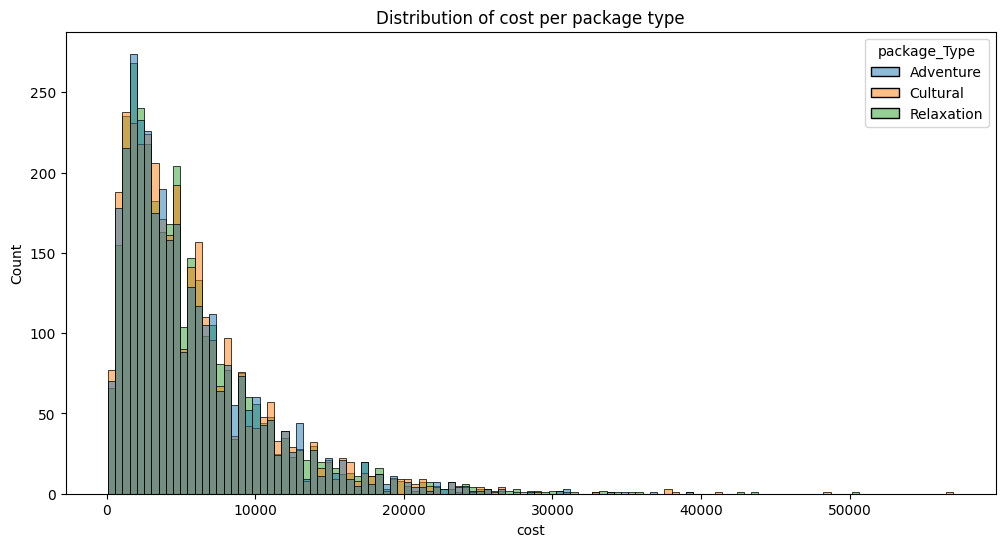

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Distribution of cost per package type")
sns.histplot(travel_dataset, x="cost", hue="package_Type",ax=ax)



##### Categorical - Categorical Data

| Plot Type          | Description                                           | When to Use                                                      |
|--------------------|-------------------------------------------------------|------------------------------------------------------------------|
| **Contingency Table (or Cross Tabulation)** | Shows the frequency of combinations of categories. | To summarize the relationship between two categorical variables in tabular form. |


<Axes: title={'center': 'The number of visitors per destination'}, xlabel='destination', ylabel='count'>

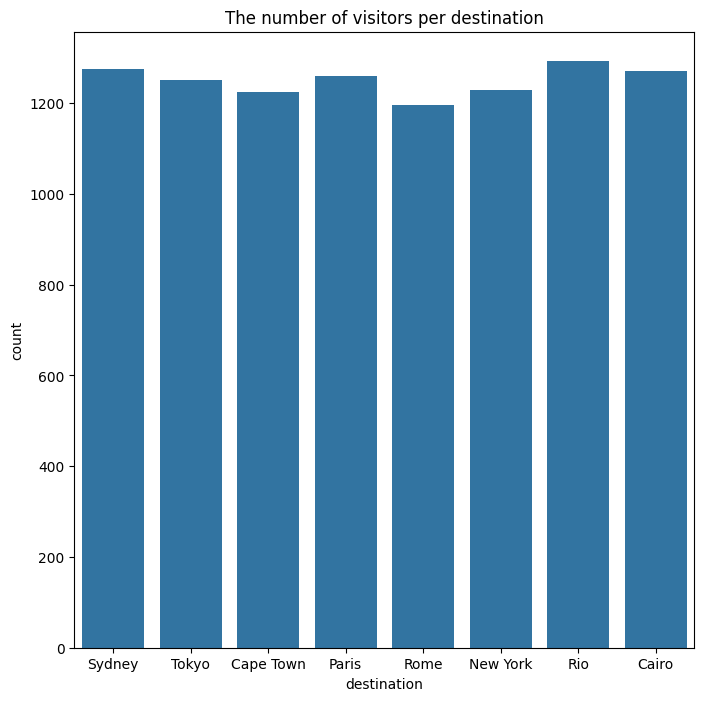

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("The number of visitors per destination")
sns.countplot(data=travel_dataset, x="destination",ax=ax)

<Axes: title={'center': 'Counts for countries and destinations'}, xlabel='country', ylabel='destination'>

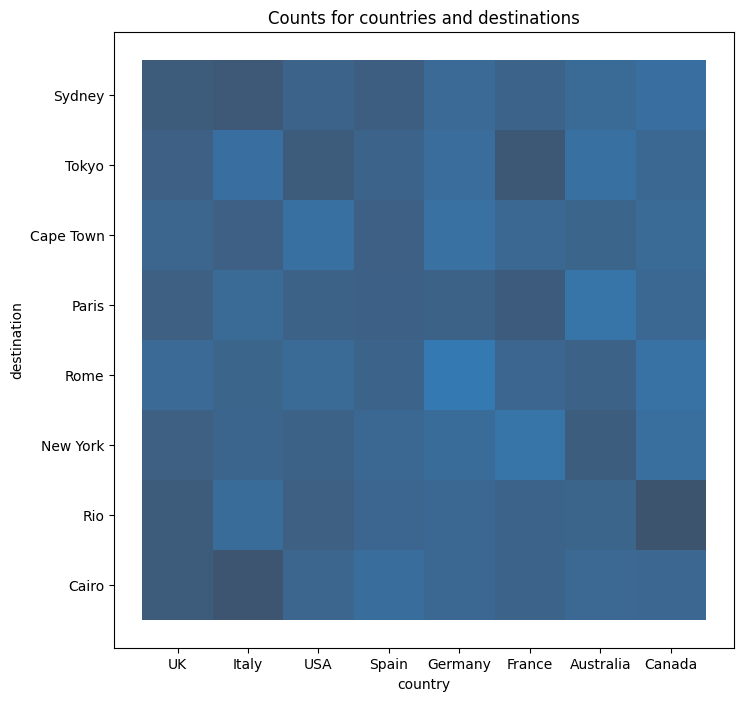

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Counts for countries and destinations")
sns.histplot(data=travel_dataset, x="country", y="destination", legend=True, ax=ax)

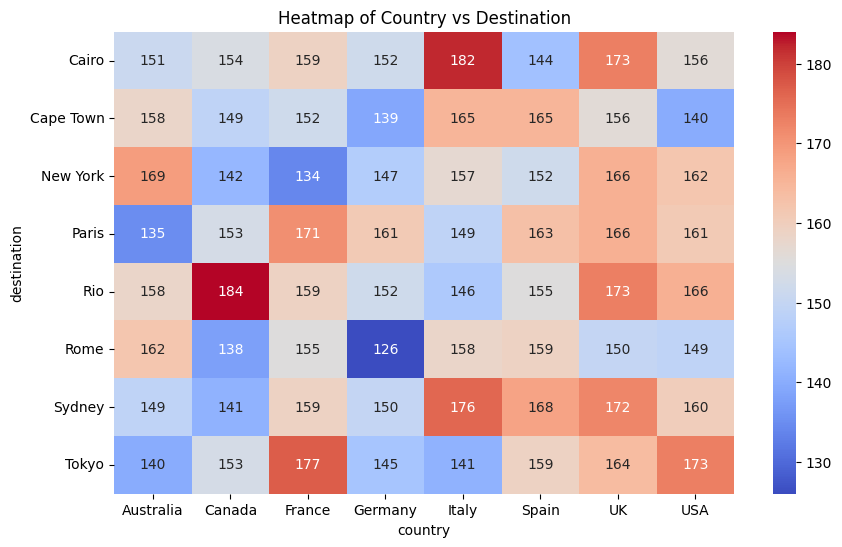

In [46]:
# crosstab() is particularly handy when you want to quickly compute the frequency of occurrence
# # between two categorical variables like country and destination
crosstab_result = pd.crosstab(travel_dataset['destination'], travel_dataset['country'])

plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.heatmap(crosstab_result, cmap='coolwarm', annot=True, fmt="d")  # You can change 'coolwarm' to other colormaps
plt.title('Heatmap of Country vs Destination')
plt.show()

##### Multivariate analysis 

**Multivariate Plots: Merging Small Multiples with Color-Coding**

**The combination's Strength**:
- **Depth & Breadth**: By pairing small multiples with color-coding, you can showcase multiple data dimensions at once.
- **Rich Insights**: Great for spotting intricate patterns and trends.
  
**Challenges**:
- **Information Overload**: Can be overwhelming due to the sheer amount of data presented.
- **Clarity & Legibility**: Risk of visual clutter. Keep designs clean and distinct.

**Best Use Cases**:
- **In-depth Exploration**: Ideal for deep data dives.
- **Specialized Audiences**: Suited for experts familiar with the data or domain.
  
**Conclusion**: 
Combining small multiples with color-coding offers a detailed data view, but it's essential to consider the audience. While powerful for **exploration**, it may be too dense for general presentations (explanation).


The true power of seaborn lies within the `hue` and `color` arguments. We can use that to make powerful graphs as follows:

<Axes: title={'center': 'Additional services vs cost, separated by package type'}, xlabel='additional_services_cost', ylabel='cost'>

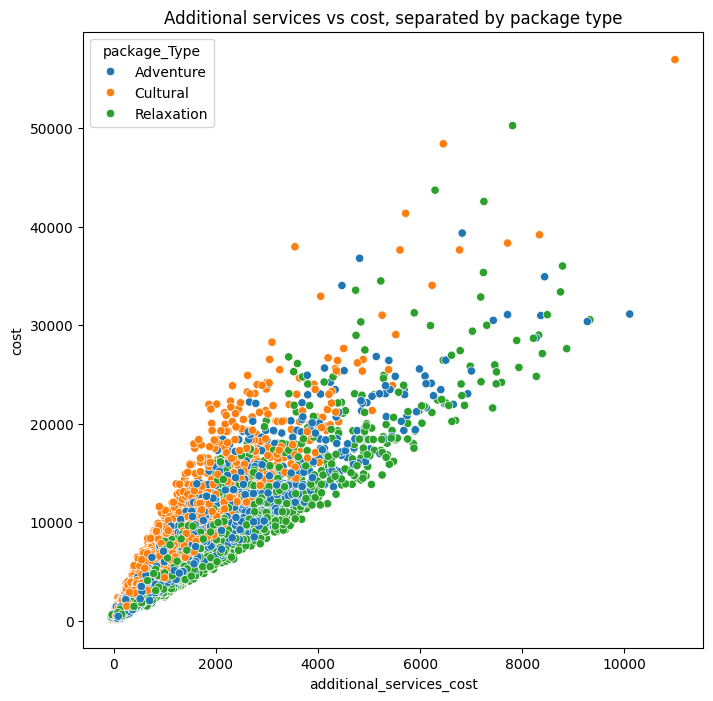

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Additional services vs cost, separated by package type")
sns.scatterplot(travel_dataset, x="additional_services_cost", y="cost", hue="package_Type",ax=ax)

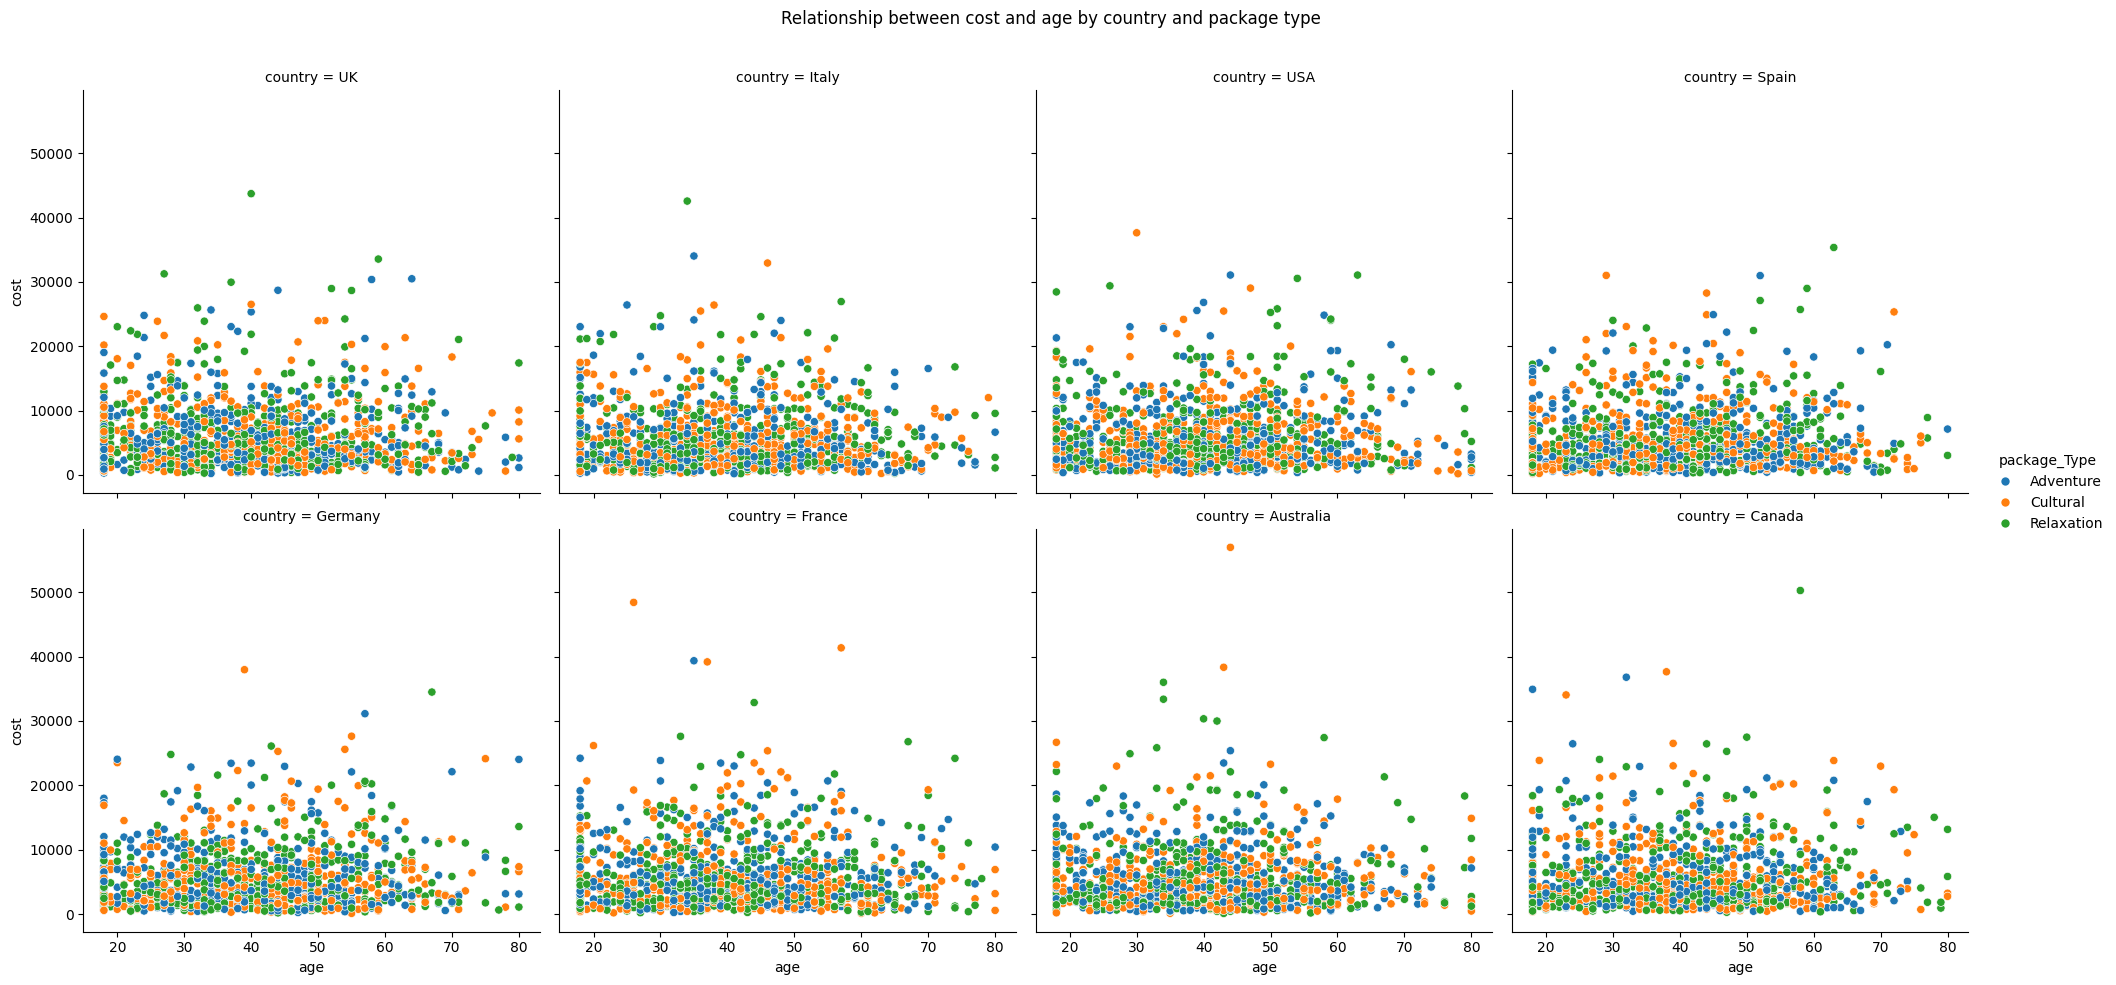

In [30]:
plot = sns.relplot(travel_dataset, x="age", y="cost", col="country", col_wrap=4, hue="package_Type");
plot.figure.suptitle("Relationship between cost and age by country and package type");
plot.figure.subplots_adjust(top=0.9) # Ensure 10 % of the space is left for the title